In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Zamfara geocoding original3.csv')
df

,State,LGA,Ward,PU-Code,PU-Name,Latitude,Longitude,Radian lat,Radians long,Distance,...,NNPP,Apc zscore,LP zscore,Pdp zscore,Nnpp zscore,Apc outlier,Lp outlier,Pdp outlier,Nnpp outlier,sum
0,ZAMFARA,ANKA,BAGEGA,36-01-01-002,BAGEGA II/MAKARANTA,11.864849,6.002428,0.21,0.10,0.00,...,3,-0.276785,-0.317826,-0.463963,0.702008,0,0,0,0,0
1,ZAMFARA,BAKURA,BIRNIN TUDU,36-02-02-001,SHIYAR TUDU/PRIMARY SCHOOL,12.653971,6.043683,0.22,0.11,1.53,...,0,2.294243,-0.317826,-0.075624,-0.414823,1,0,0,0,1
2,ZAMFARA,BAKURA,BIRNIN TUDU,36-02-02-012,S/AJIYA II/VILLAGE HEAD OFFICE,12.655153,6.042773,0.22,0.11,0.00,...,0,0.928768,-0.317826,0.312715,-0.414823,0,0,0,0,0
3,ZAMFARA,BAKURA,DAMRI,36-02-03-001,DAMRI I/MODEL PRIMARY SCHOOL,12.409891,5.837558,0.22,0.10,0.62,...,0,4.951382,-0.317826,-0.443524,-0.414823,1,0,0,0,1
4,ZAMFARA,BAKURA,DANKADU,36-02-04-004,MADACCI II/ADULT EDU. CLASS,12.763252,5.877596,0.22,0.10,0.69,...,14,0.252182,-0.317826,2.969774,4.797058,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,ZAMFARA,MARADUN,FARU / MAGAMI,36-09-03-029,FARU /DISPENSARY,12.750569,6.287062,0.22,0.11,1.30,...,0,-0.584325,2.299568,-0.504841,-0.414823,0,1,0,0,1
66,ZAMFARA,MARADUN,JANBAKO,36-09-06-014,SHIYAR DANKADU II/KYALETA,12.763252,5.877596,0.22,0.10,0.80,...,1,0.104563,-0.317826,-0.790986,-0.042546,0,0,0,0,0
67,ZAMFARA,TALATA MAFARA,SHIYAR GALADIMA,36-12-09-044,DAN JALLABA III/ UNGUWAR ROGO/ BAKIN TRANSFORMER,12.122181,6.223582,0.21,0.11,1.41,...,0,0.166071,3.608265,-0.463963,-0.414823,0,1,0,0,1
68,ZAMFARA,TALATA MAFARA,SHIYAR GALADIMA,36-12-09-051,TABKIN BUSAU IV/ N.D.L.E.A.,12.122181,6.223582,0.21,0.11,0.00,...,1,1.359323,-0.317826,-0.831864,-0.042546,0,0,0,0,0


In [2]:
# Initialize DBSCAN clustering
epsilon = 1.0 / 6371.0  # Convert 1 km to radians (distance threshold for DBSCAN)
min_samples = 2  # Minimum number of samples in a cluster (adjust as needed)
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine')

In [3]:
# Extract coordinates and convert to radians
coords = df[['Latitude', 'Longitude']].values
coords_rad = np.radians(coords)

In [4]:
# Fit DBSCAN clustering model
df['cluster'] = dbscan.fit_predict(coords_rad)

In [5]:
# Calculate mean votes for each cluster and each party
cluster_means = df.groupby('cluster')[['APC', 'PDP', 'LP', 'NNPP']].mean()
cluster_means.columns = [f"{party}_mean" for party in ['APC', 'PDP', 'LP', 'NNPP']]

In [6]:
# Merge cluster means back to the original DataFrame
df = df.merge(cluster_means, left_on='cluster', right_index=True)

In [7]:
# Compute the difference from the cluster mean for each party
for party in ['APC', 'PDP', 'LP', 'NNPP']:
    df[f'{party}_diff'] = df[party] - df[f'{party}_mean']

In [8]:
df

,State,LGA,Ward,PU-Code,PU-Name,Latitude,Longitude,Radian lat,Radians long,Distance,...,sum,cluster,APC_mean,PDP_mean,LP_mean,NNPP_mean,APC_diff,PDP_diff,LP_diff,NNPP_diff
0,ZAMFARA,ANKA,BAGEGA,36-01-01-002,BAGEGA II/MAKARANTA,11.864849,6.002428,0.21,0.10,0.00,...,0,0,64.000000,27.000000,0.000000,1.500000,22.000000,9.000000,0.000000,1.500000
56,ZAMFARA,ANKA,BAGEGA,36-01-01-020,TUNTAJIYA PRI SCH,11.864849,6.002428,0.21,0.10,1.96,...,0,0,64.000000,27.000000,0.000000,1.500000,-22.000000,-9.000000,0.000000,-1.500000
1,ZAMFARA,BAKURA,BIRNIN TUDU,36-02-02-001,SHIYAR TUDU/PRIMARY SCHOOL,12.653971,6.043683,0.22,0.11,1.53,...,1,1,239.500000,64.500000,0.000000,0.000000,55.500000,-9.500000,0.000000,0.000000
2,ZAMFARA,BAKURA,BIRNIN TUDU,36-02-02-012,S/AJIYA II/VILLAGE HEAD OFFICE,12.655153,6.042773,0.22,0.11,0.00,...,0,1,239.500000,64.500000,0.000000,0.000000,-55.500000,9.500000,0.000000,0.000000
3,ZAMFARA,BAKURA,DAMRI,36-02-03-001,DAMRI I/MODEL PRIMARY SCHOOL,12.409891,5.837558,0.22,0.10,0.62,...,1,-1,111.481481,48.185185,0.185185,0.851852,399.518519,-11.185185,-0.185185,-0.851852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,ZAMFARA,TSAFE,"YANKUZO ""A""",36-13-04-002,SHIYAR S. AIKI / KOFAR YUGUDA,11.913531,7.114404,0.21,0.12,0.00,...,0,8,55.000000,16.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
47,ZAMFARA,TSAFE,TSAFE,36-13-08-012,BAKIN GULBI / DANFAKO,11.955278,6.918230,0.21,0.12,1.39,...,0,9,58.500000,59.000000,0.000000,1.000000,25.500000,-1.000000,0.000000,-1.000000
48,ZAMFARA,TSAFE,TSAFE,36-13-08-027,RUGGAR NA ALI / PRIMARY SCHOOL,11.955278,6.918230,0.21,0.12,0.00,...,0,9,58.500000,59.000000,0.000000,1.000000,-25.500000,1.000000,0.000000,1.000000
49,ZAMFARA,TSAFE,CHEDIYA,36-13-09-004,UNG. SARKIN FAWA / DAN FAKO,11.996972,6.953123,0.21,0.12,0.11,...,0,10,31.500000,151.500000,0.500000,0.500000,3.500000,-20.500000,-0.500000,-0.500000


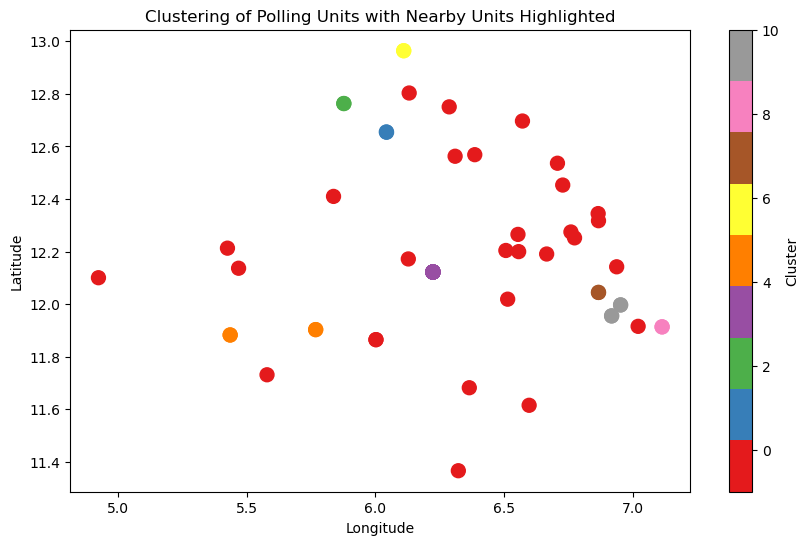

In [9]:
# Visualization (assuming 'PU-Name' columns exist in both DataFrames)
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='Set1', s=100)

# Plot lines connecting close polling unit pairs (if close_polling_units_df is available)
if 'close_polling_units_df' in locals():
    for index, row in close_polling_units_df.iterrows():
        pu1 = df[df['PU-Name'] == row['PU-1']].iloc[0]
        pu2 = df[df['PU-Name'] == row['PU-2']].iloc[0]
        ax.plot([pu1['Longitude'], pu2['Longitude']], [pu1['Latitude'], pu2['Latitude']], 'k--', lw=0.5)

plt.colorbar(scatter, label='Cluster')
plt.title('Clustering of Polling Units with Nearby Units Highlighted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
df.to_excel('Clustering_data PU.xlsx')

In [11]:
# outlier score (difference from mean)
for party in ['APC', 'PDP', 'LP', 'NNPP']:
    if party in df.columns:
        df[f'{party}_outlier_score'] = df[party] - df[f'{party}_mean']

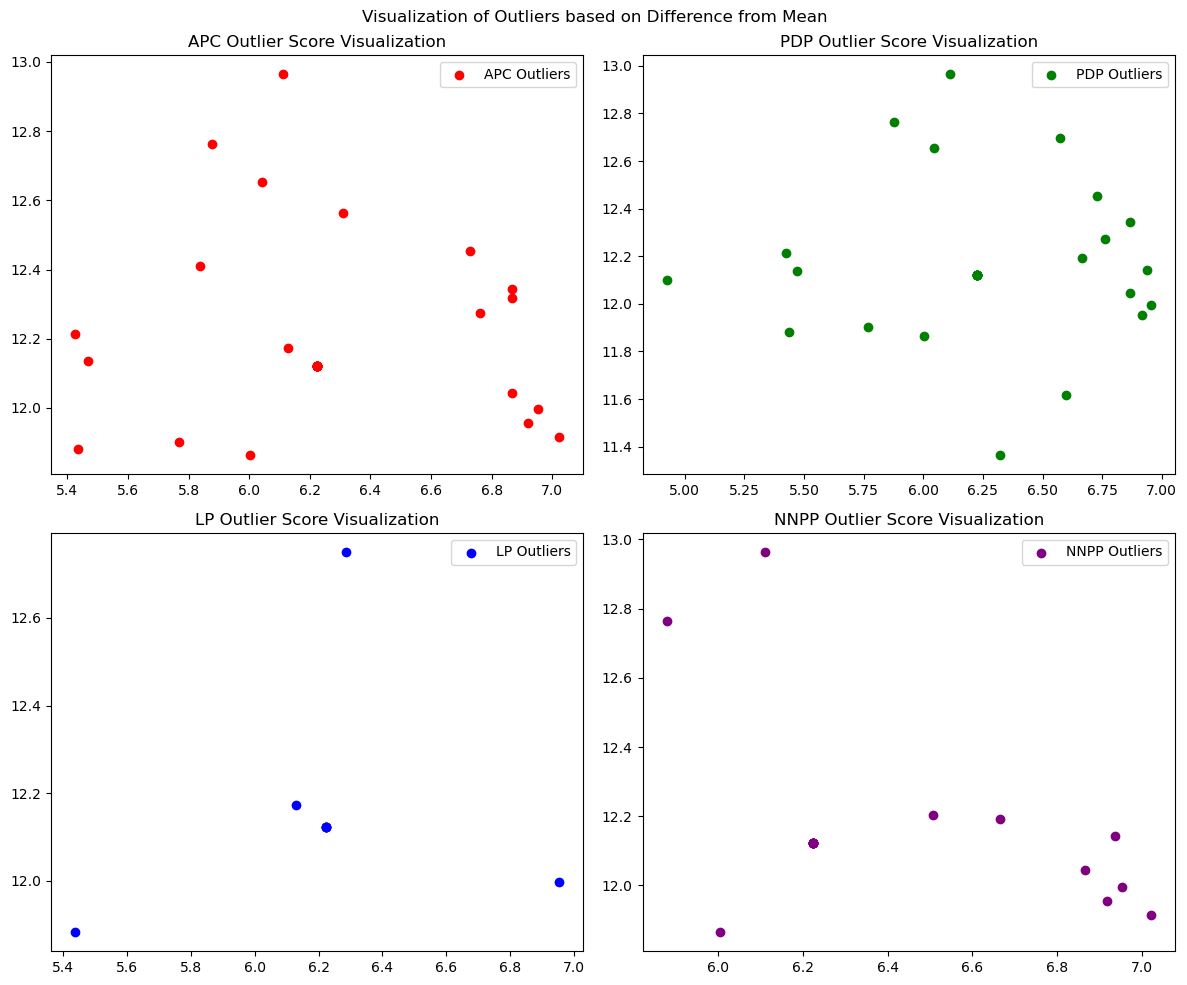

In [12]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

parties = ['APC', 'PDP', 'LP', 'NNPP']
colors = ['red', 'green', 'blue', 'purple']  # Adjust colors as needed

# Loop through parties and plot on separate subplots
for i, party in enumerate(parties):
    if party in df.columns:
        outliers = df[df[f'{party}_outlier_score'] > 0]  # Select outliers (positive difference)
        non_outliers = df[df[f'{party}_outlier_score'] <= 0]  # Select non-outliers

        # Scatter plot for outliers
        axs[i // 2, i % 2].scatter(outliers['Longitude'], outliers['Latitude'], c=colors[i], label=f'{party} Outliers')

        # Scatter plot for non-outliers (optional)
        # axs[i // 2, i % 2].scatter(non_outliers['Longitude'], non_outliers['Latitude'], alpha=0.3, c=colors[i], label=f'{party} Non-Outliers')

        axs[i // 2, i % 2].set_title(f'{party} Outlier Score Visualization')
        axs[i // 2, i % 2].legend()

# Adjust layout and labels (optional)
fig.suptitle('Visualization of Outliers based on Difference from Mean')
plt.tight_layout()
plt.show()

In [13]:
import seaborn as sns

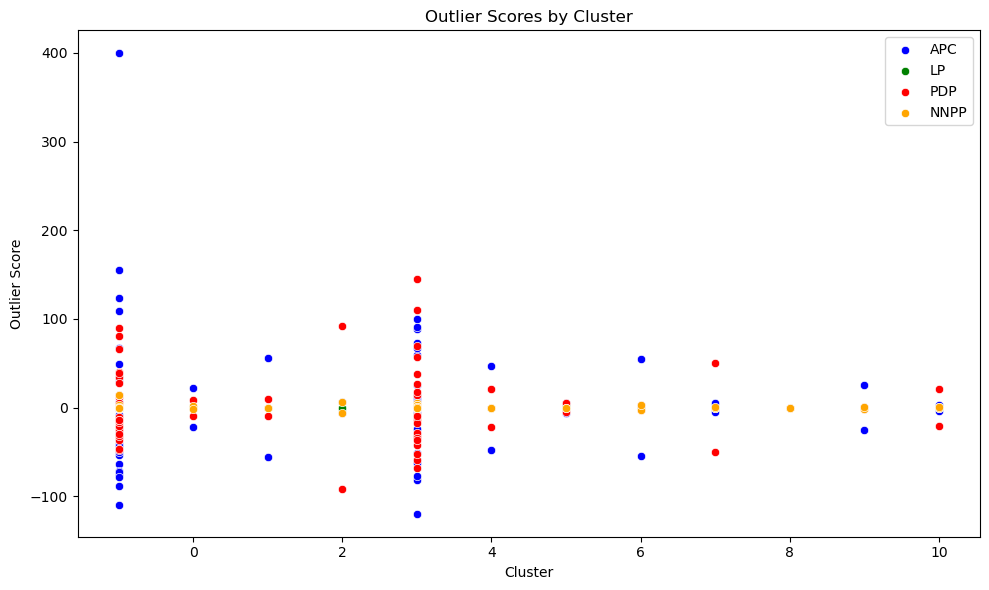

In [14]:
# Plotting
plt.figure(figsize=(10, 6))

sns.scatterplot(x='cluster', y='APC_outlier_score', data=df, color='blue', label='APC')
sns.scatterplot(x='cluster', y='LP_outlier_score', data=df, color='green', label='LP')
sns.scatterplot(x='cluster', y='PDP_outlier_score', data=df, color='red', label='PDP')
sns.scatterplot(x='cluster', y='NNPP_outlier_score', data=df, color='orange', label='NNPP')

# Customizing the plot
plt.title('Outlier Scores by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Outlier Score')
plt.legend()

plt.tight_layout()
plt.show()
